# Day 4 | Polynomial Regression

目前學習到的線性函數顧名思義就是線性的，線性函數的優點是可以容易的推斷與闡述，但是相對的線性函數的缺點是其假設的都是一個趨勢的推估，對於實際預測可能效果較差一點。這時多項式函數就可以改善這個問題，多項式函數將自變數增加並且提高次方項，提供一個更適配資料的趨勢線(或是平面)。
相關參考資料如下：
1. Machine Learning筆記7 - Polynomial Regression: [Link](https://fu-sheng-wang.blogspot.com/2017/02/machine-learning7-polynomial-regression.html)
2. Polynomial Regression: [Link](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

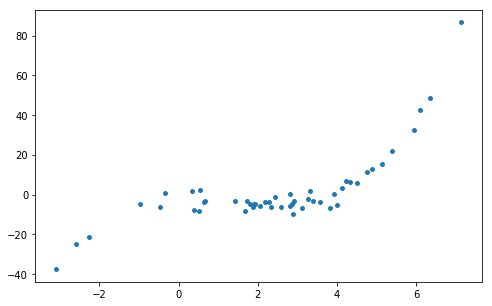

In [76]:
## 自己隨機生成一個數據
x = 2 - 3 * np.random.normal(0, 1, 50)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3)+ np.random.normal(-3, 3, 50)
plt.figure(figsize=(8, 5))
plt.scatter(x,y, s = 15)
plt.show()

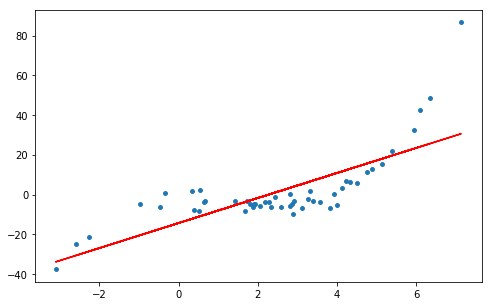

In [77]:
## 而如果我們用一個線性回歸模型去fit這組數據，結果會像下圖這樣
from sklearn.linear_model import LinearRegression

x = x.reshape(-1,1)
y = y.reshape(-1,1)

linear = LinearRegression()
linear.fit(x, y)
linear_y = linear.predict(x)
plt.figure(figsize=(8, 5))
plt.scatter(x,y, s = 15)
plt.plot(x,linear_y, color = 'red')
plt.show()

## 這樣看起來預測的結果就不會是太好，而其實在做EDA的時候就會發現可能X,Y兩個Features沒有線性相關，則可以用多項式回歸來嘗試

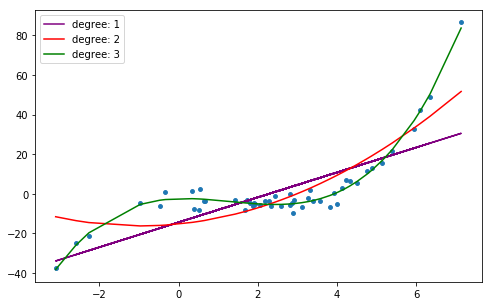

In [78]:
## import所需套件
from sklearn.preprocessing import PolynomialFeatures

## 我們將x轉換為多項式
poly_features = PolynomialFeatures(degree=2)
x_poly_d2 = poly_features.fit_transform(x)
# print(x_poly_d2, x)

ploy_model = LinearRegression()
ploy_model.fit(x_poly_d2, y)
poly_y = ploy_model.predict(x_poly_d2)
new_X, new_y = zip(*sorted(zip(x, poly_y))) ## have to sort the poly prediction with the x
# plt.figure(figsize=(8, 5))
# plt.scatter(x,y, s = 15)
# plt.plot(new_X, new_y, color = 'red')
# plt.show()

## 是否可以看到相較於線性回歸模型的預測線，二次項的多元回歸線性模型看起來比較適配這組數據呢？ 那我們再將次方項拉高到3次方

### 三次方多項式
poly_features = PolynomialFeatures(degree=3)
x_poly_d3 = poly_features.fit_transform(x)

ploy_model_3 = LinearRegression()
ploy_model_3.fit(x_poly_d3, y)
poly_y_3 = ploy_model_3.predict(x_poly_d3)
new_X_3, new_y_3 = zip(*sorted(zip(x, poly_y_3))) ## have to sort the poly prediction with the x
plt.figure(figsize=(8, 5))
plt.scatter(x,y, s = 15)
plt.plot(x,linear_y, color = 'purple', label = 'degree: 1')
plt.plot(new_X, new_y, color = 'red', label = 'degree: 2')
plt.plot(new_X_3, new_y_3, color = 'green', label = 'degree: 3')
plt.legend()
plt.show()

## 可以看到綠色線已經完全吻合資料了，但是這樣是好事嗎？ 接下來就要講到所謂Bias與Variance的trade off，以及overfitting的問題。

____
# Trade off between Variance and Bias
____

由上面的作圖可以看到，隨著次方項的增加，預測模型就會越fit資料，那是不是次方項越高就越好呢？其實不是。我們在訓練模型時，都是將資料分為訓練集與測試集，如果我們的模型越fit訓練及的資料，就代表說他越沒有能力去預測訓練及資料以外的數據，也就是會造成所謂的overfitting的狀況。也可以由下面這張圖來說明：
<center>
    <img align="center" src="picture_1.png" width="500">
</center>

假設我們把訓練模型比喻成打靶，把心中央是那一個我們不知道而要去預測的函數，而靶上的彈孔呢是我們透過訓練後預測出來的結果，我們可以看到誤差有兩個來源variance與bias，那何謂這兩種誤差差在哪？
比方說我們使用較簡單的模型（如線性回歸模型），其模型的預測結果受到資料的影響(variance)是較小的，但是實際預測出來的結果可能跟目標(bais)是相差較大的，就如同左下的靶一樣；而較複雜的模型（如多項式回歸模型）對於資料的擬合較好，預測出來的值跟目標是(bias)比較接近的，但是受到新資料的影響(variance)就比較大，就如同右上的靶一樣。

##### 那這樣來說，什麼又是overfitting? underfitting?
簡單來說，所謂underfitting就是模型所預測的結果bias的誤差太大，就表示模型並沒有辦法很好預測目標；而overfitting則是相反，表示預測的結果在訓練集的資料誤差很小，但是在測試集上的預測誤差很大。
因此我們需要找到variance與bias之間的權衡，這個就會是最佳的模型，訓練出來的模型要有一定的泛化能力，這樣才能對新的資料集有較好的預測。而其實這樣的問題在分類上也會碰到喔！
<center>
    <img align="center" src="picture_2.png" width="500">
</center>

參考資料：
1. 李宏毅老師課程：[ML Lecture 2: Where does the error come from?](https://www.youtube.com/watch?v=D_S6y0Jm6dQ&list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&index=5)
2. Understanding the Bias-Variance Tradeoff : [Link](http://scott.fortmann-roe.com/docs/BiasVariance.html)